### Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Importing the data:

In [2]:
data = pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
data = data.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Trying to see which are the frequent movies bought together by changing the Support value:

In [5]:
# function to compute the frequent item set
def frequent_itemsets(suppport, length):
    frequent_itemsets = apriori(data, min_support=suppport, max_len=length,use_colnames = True)
    return frequent_itemsets 

In [6]:
# To plot the network map graph. arguments= rules dataset, x-axis, y-axis
def plotting_frequent_items(rules, x=20,y=20):
    fig, ax=plt.subplots(figsize=(x,y))
    graph=nx.from_pandas_edgelist(rules,source="antecedents",target='consequents')
    nx.draw(graph,with_labels=True)
    plt.show()

### Building the model:

In [7]:
fi_1 = frequent_itemsets(0.12, 3)
fi_1.sort_values('support',ascending = False,inplace=True)
fi_1.sort_values

<bound method DataFrame.sort_values of     support                           itemsets
1       0.7                        (Gladiator)
0       0.6                      (Sixth Sense)
4       0.6                          (Patriot)
10      0.6               (Patriot, Gladiator)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Patriot, Sixth Sense)
12      0.4  (Patriot, Sixth Sense, Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
9       0.2          (Sixth Sense, Green Mile)
11      0.2                     (LOTR1, LOTR2)>

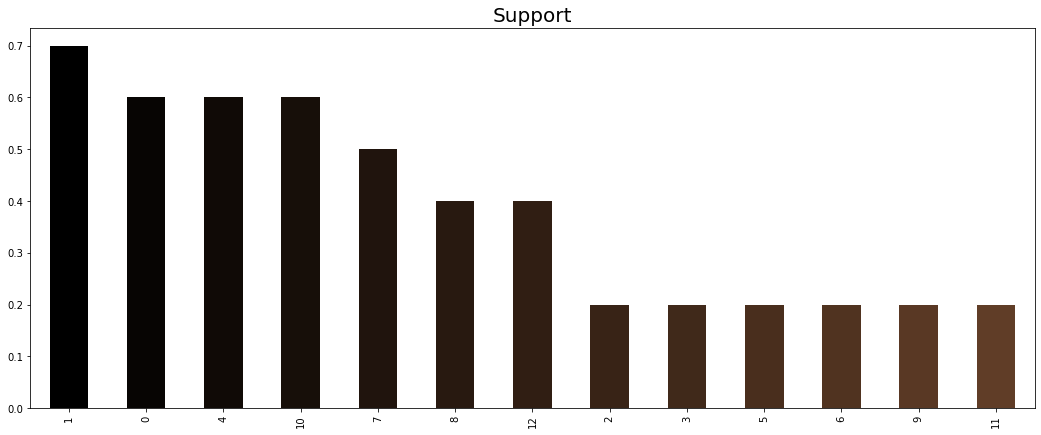

In [8]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
fi_1["support"].plot.bar(color = color)
plt.title('Support', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

###### Observation: The movie Gladiator is bought the most and the movies Sixth Sense and Patriot and the combinaton of Patriot and Gladiator are bought the the second most

In [9]:
rules = association_rules(fi_1, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
15,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


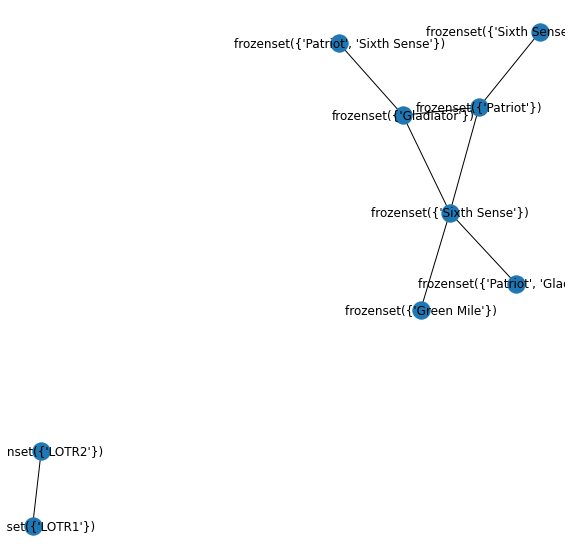

In [18]:
plotting_frequent_items(rules, 10, 10)

###### As we know the highest movies that are sold are the Gladiator followed by the movies Sixth Sense and Patriot and the combination of Patriot & Gladiator, in the above graph we can see the most frequent movies bought along with the same movies

###### We can also see that LOTR1 and LOTR2 are bought together most frequently

### Reducing the support value:

In [19]:
fi_2 = frequent_itemsets(0.1, 3)
fi_2.sort_values('support',ascending = False,inplace=True)
fi_2.sort_values

<bound method DataFrame.sort_values of     support                                  itemsets
1       0.7                               (Gladiator)
0       0.6                             (Sixth Sense)
17      0.6                      (Patriot, Gladiator)
4       0.6                                 (Patriot)
10      0.5                  (Sixth Sense, Gladiator)
13      0.4                    (Patriot, Sixth Sense)
30      0.4         (Patriot, Sixth Sense, Gladiator)
3       0.2                           (Harry Potter1)
9       0.2                              (Green Mile)
5       0.2                                   (LOTR2)
2       0.2                                   (LOTR1)
22      0.2                            (LOTR1, LOTR2)
16      0.2                 (Sixth Sense, Green Mile)
36      0.1       (LOTR2, Harry Potter1, Sixth Sense)
31      0.1            (LOTR, Sixth Sense, Gladiator)
32      0.1      (Green Mile, Sixth Sense, Gladiator)
33      0.1       (Harry Potter1, LOTR1, Si

In [20]:
rules1 = association_rules(fi_2, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
82,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
123,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
48,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
34,"(LOTR1, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
35,(Harry Potter1),"(LOTR1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
36,(LOTR1),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
87,"(LOTR2, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
39,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf


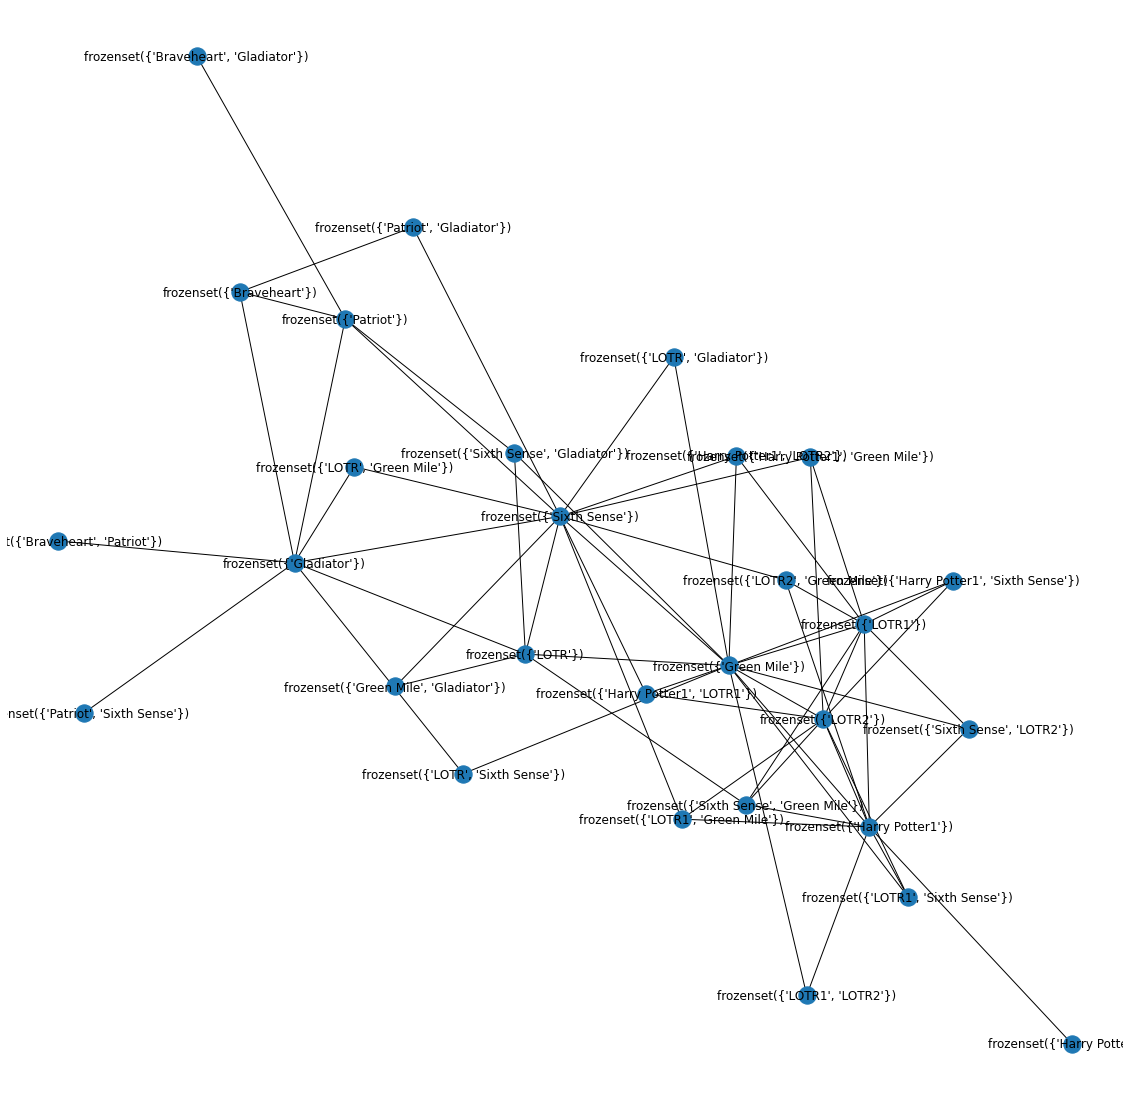

In [24]:
plotting_frequent_items(rules1)

###### Observation: We can see that when the support value is decreased the items increase and therefore we can see more items in the above plot. This is because much more items pass the support value threshold 

### Increasing the support value and decreasing the minimum value to 2:

In [25]:
fi_3 = frequent_itemsets(0.15, 2)
fi_3.sort_values('support',ascending = False,inplace=True)
fi_3.sort_values

<bound method DataFrame.sort_values of     support                   itemsets
1       0.7                (Gladiator)
0       0.6              (Sixth Sense)
4       0.6                  (Patriot)
10      0.6       (Patriot, Gladiator)
7       0.5   (Sixth Sense, Gladiator)
8       0.4     (Patriot, Sixth Sense)
2       0.2                    (LOTR1)
3       0.2            (Harry Potter1)
5       0.2                    (LOTR2)
6       0.2               (Green Mile)
9       0.2  (Sixth Sense, Green Mile)
11      0.2             (LOTR1, LOTR2)>

In [28]:
rules2 = association_rules(fi_3, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


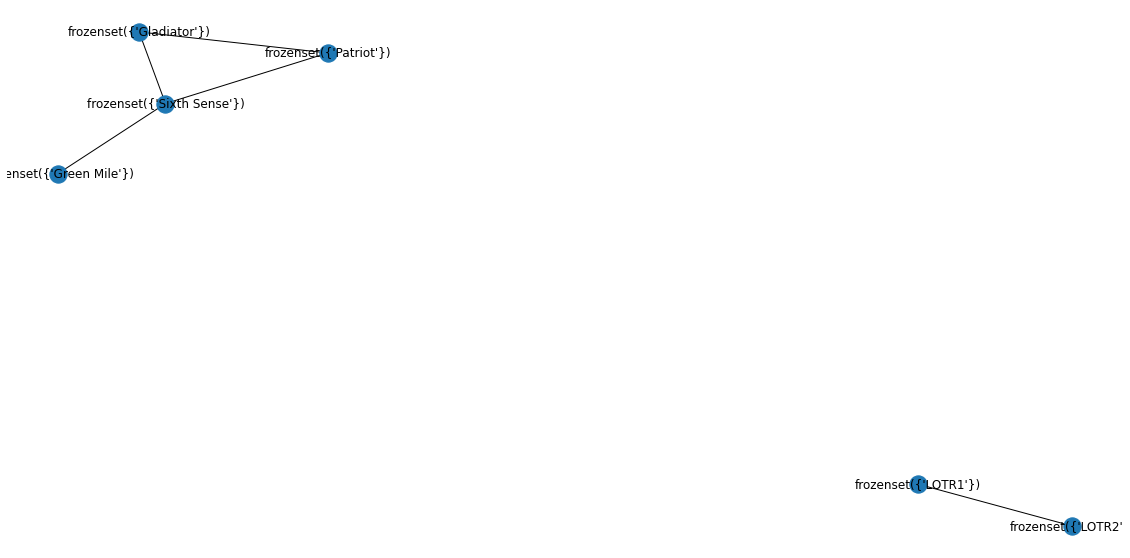

In [45]:
plotting_frequent_items(rules2, 20, 10)

###### Observation:We can see that when we increase the support value threshold and decrease the minimum items number, the items decrease and we can see the relationship between the movies that are frequently bought together

### Increasing the confidence threshold:

In [46]:
fi_4 = frequent_itemsets(0.15, 2)
fi_4.sort_values('support',ascending = False,inplace=True)
fi_4.sort_values

<bound method DataFrame.sort_values of     support                   itemsets
1       0.7                (Gladiator)
0       0.6              (Sixth Sense)
4       0.6                  (Patriot)
10      0.6       (Patriot, Gladiator)
7       0.5   (Sixth Sense, Gladiator)
8       0.4     (Patriot, Sixth Sense)
2       0.2                    (LOTR1)
3       0.2            (Harry Potter1)
5       0.2                    (LOTR2)
6       0.2               (Green Mile)
9       0.2  (Sixth Sense, Green Mile)
11      0.2             (LOTR1, LOTR2)>

In [48]:
rules3 = association_rules(fi_3, metric="confidence", min_threshold=0.6)
rules3.head(20)
rules3.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


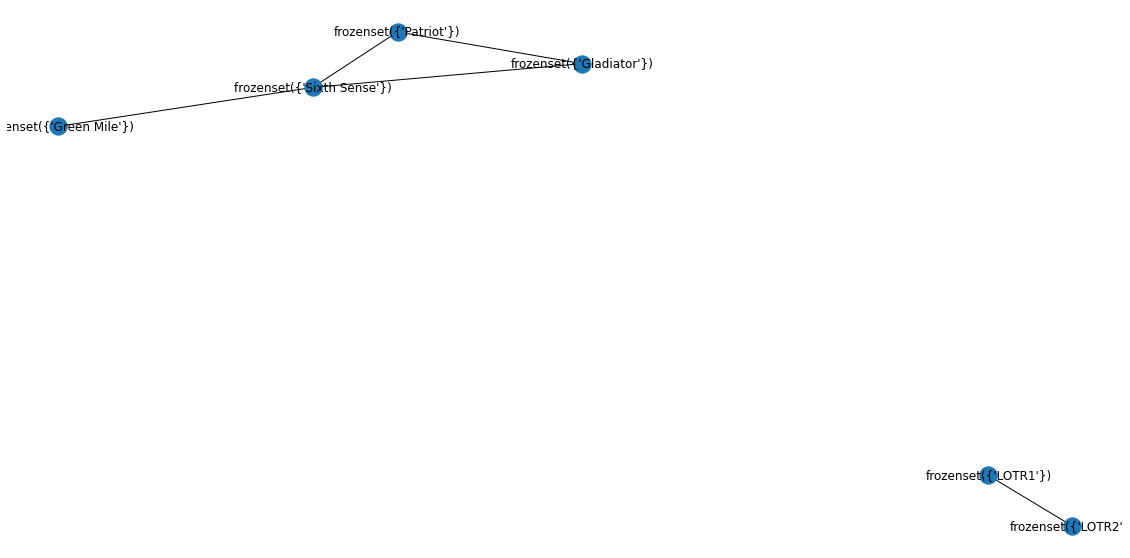

In [52]:
plotting_frequent_items(rules3, 20, 10)

###### Observation: We can easily find the association with the most frequently sold movies (Gladiator, Sixth Sense, Patriot, Green Mile, LOTR1)